In [ ]:
import gzip
import csv
import re
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
advocate_dir = 'BeerAdvocate'

In [3]:
beer_BA = pd.read_csv(os.path.join(advocate_dir, 'beers.csv'))

In [4]:
reviews_ba = pd.read_csv(os.path.join(advocate_dir, 'ratings_BA.csv'))

In [5]:
beer_BA.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN


In [7]:
beer_BA_grouped = beer_BA.groupby('style')

In [8]:
most_fam_b_per_style = pd.DataFrame()
for name, gruop in beer_BA_grouped:
    g = gruop.sort_values(ascending=[False],by=['nbr_reviews'])
    most_fam_b_per_style = pd.concat([most_fam_b_per_style, g.head(1)])

In [9]:
most_fam_b_per_style.sort_values(ascending=[False],by=['nbr_reviews']).head(2)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
180458,2093,90 Minute IPA,64,Dogfish Head Brewings & Eats,American Double / Imperial IPA,15548,3899,4.24,94.0,96.0,9.0,4.273975,NaN,0,NaN
226278,11757,Founders Breakfast Stout,1199,Founders Brewing Company,American Double / Imperial Stout,16509,3811,4.47,99.0,100.0,8.3,4.513760,NaN,0,NaN


In [13]:
most_fam_stout = most_fam_b_per_style.sort_values(ascending=[False],by=['nbr_reviews']).iloc[1]
reviews_Stout = reviews_ba[reviews_ba['beer_id']==most_fam_stout.beer_id]
text_rev_stout = reviews_Stout[reviews_Stout['review']==True]['text']

In [16]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alessandro\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alessandro\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [14]:
import csv
import json
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
from string import punctuation


def extract_keywords(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    punkt_symbols = set(punctuation)
    removable_words= stop_words.union(punkt_symbols)

    filtered_tokens = [word for word in tokens if ((word not in removable_words) and word.isalpha())]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

    return stemmed_tokens

def process_df(df):
    all_keywords = []
    for text in df:
        keywords = extract_keywords(text)
        all_keywords.extend(keywords)

    return Counter(all_keywords)


In [15]:
keyword_counts = process_df(text_rev_stout)
most_c_words_stout = [word for word in keyword_counts.most_common(30)]

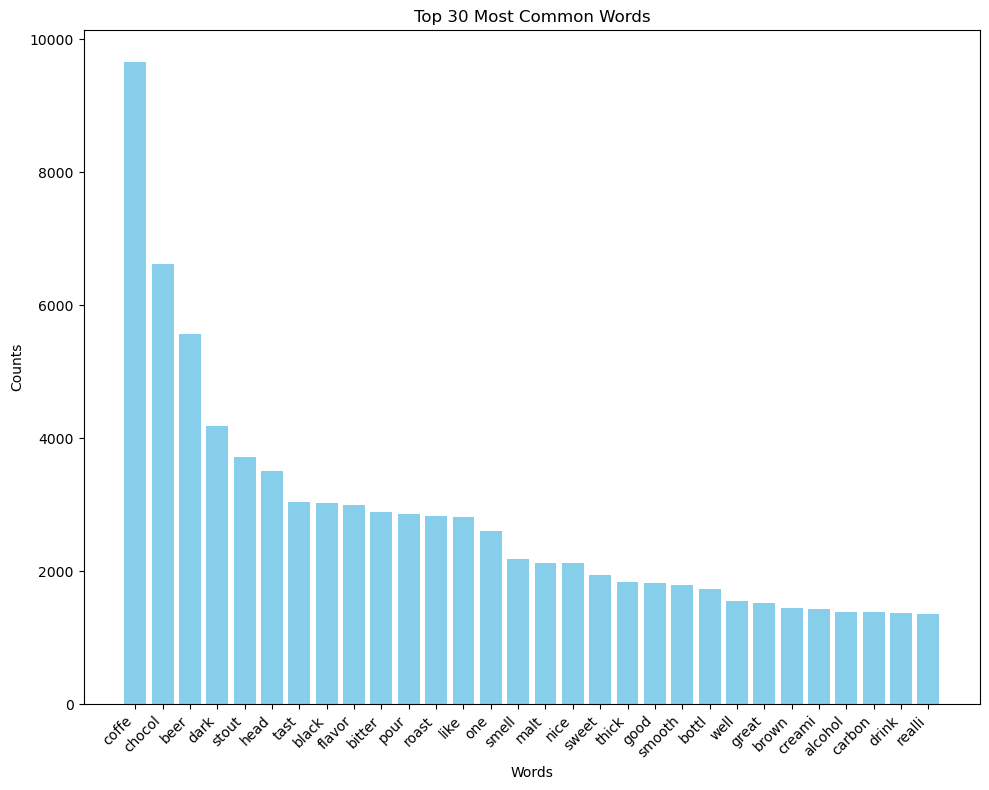

In [16]:
words, counts = zip(*most_c_words_stout)

# Create the bar plot
plt.figure(figsize=(10, 8))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Top 30 Most Common Words')
plt.tight_layout()  # Adjust layout for readability
plt.show()

__List of terms, divided by category, used to determine whether a person is a beer expert__

In [17]:
expert_terms = {
    "flavor": ['caramel', 'toffee', 'bready', 'biscuity', 'nutty', 'roasted', 'chocolate', 'coffee', 'mocha','molasses','syrupy','smokey','toasted','vanilla','cocoa','brown sugar',
              'hoppy', 'citrusy', 'tropical', 'floral', 'piney', 'resinous', 'herbal', 'grassy', 'earthy', 'dank', 'spicy', 'peppery', 'juicy', 'zesty', 'tangy', 'sharp', 'resin', 'bitterness',
               'estery',' fruity', 'berry',' cherry',' apple',' banana', 'pear', 'stone fruit', 'plum', 'fig', 'raisin', 'peach',' apricot', 'dark fruit', 'citrus zest', 'lemon', 'orange peel', 'pineapple', 'mango', 'lychee',
               'oaky', 'woody', 'bourbon', 'whiskey', 'rye', 'tequila', 'brandy','vinous', 'sour', 'tart', 'acidic', 'lacto', 'brett', 'farmhouse', 'honeyed', 'clove', 'bubblegum', 'funky', 'barnyard'], 
    "aroma": ['bouquet', 'nose', 'aromatic', 'fragrant','perfumed', 'faint', 'musky', 'dank', 'subtle', 'fruity', 'floral', 'yeasty', 'clean', 'malty', 'crisp', 'pungent', 'spicy', 'smokey', 'earthy'],  
    "mouthfeel": [ 'body','full-bodied', 'medium-bodied', 'light-bodied', 'thick', 'thin', 'mouthfeel', 'creamy', 'smooth', 'velvety', 'oily', 'astringent','tannic', 'chalky', 'drying', 'slick', 'watery', 'effervescent', 'fizzy', 'tingly', 'prickly', 'carbonation', 'viscosity', 'warming', 'coating', 'biting', 'sharp'],
    "brewing": [ 'dry hopping', 'double dry hopping', 'barrel-aged', 'bottle-conditioned', 'open fermentation', 'secondary fermentation', 'wort', 'mash, sparging', 'cold crashing', 'decoction', 'conditioning', 'lacto', 'yeast strain', 'adjuncts', 'grains', 'malt', 'specialty grains'],
    "technical": [ 'balance', 'complexity', 'depth', 'layers', 'nuanced', 'refined', 'structured', 'profile', 'round', 'harmonious', 'clean', 'crisp', 'finish', 'lingering', 'evolving', 'sharp', 'clarity', 'purity', 'dense', 'robust', 'powerful', 'light', 'restrained', 'vibrant', 'subdued', 'heavy', 'integrity', 'layered', 'exemplar', 'benchmark', 'classic', 'signature style', 'finesse', 'elegance'],
    "appearance": ['hazy', 'cloudy', 'opaque', 'translucent', 'clear', 'bright', 'unfiltered', 'filtered', 'lacing', 'foam', 'frothy', 'rocky head', 'stable head', 'head retention', 'appearance', 'golden', 'amber', 'ruby', 'copper', 'dark', 'black', 'mahogany', 'light', 'straw', 'yellow', 'chestnut', 'tan', 'off-white head' ],
    "judgment": [ 'exemplar', 'well-integrated', 'restrained', 'harmonious', 'round', 'classic example', 'benchmark', 'flawless', 'exceptional', 'outstanding', 'world-class', 'traditional', 'innovative', 'unconventional', 'unique', 'reference point', 'nuanced' ],
    "off_flavors": [ 'oxidized', 'metallic', 'cardboard', 'stale', 'sulfur', 'skunky', 'diacetyl', 'astringent', 'phenolic', 'acetaldehyde', 'DMS', 'cloying', 'solvent-like', 'overly bitter', 'thin', 'harsh', 'vegetal', 'buttery', 'musty, moldy', 'medicinal' ],
    "miscellaneous": [ 'initial impression', 'mid-palate', 'aftertaste', 'finish', 'lingering', 'mouth-coating', 'evolving flavor', 'balanced start', 'unfolding', 'developing', 'peak', 'bright finish', 'dry finish', 'clean ending', 'reminiscent', 'similar to', 'akin to', 'comparable', 'surpasses', 'diverges from', 'evokes', 'hints of', 'resembles', 'distinct from', 'notes of', 'echoes' ]
}

In [18]:
def exp_term_score(text):
    scores = {category: 0 for category in expert_terms}

    # Count occurrences of terms in each category
    for category, terms in expert_terms.items():
        for term in terms:
            if term in text:
                scores[category] += 1  # Accumulate count for the category
    scores["expertness_score"] = sum(scores.values())
    return scores

In [30]:
def score_df(x):
    x = x.copy()
    x.loc[:, 'text_lower'] = x['text'].str.lower()
    scores =  x['text_lower'].apply(exp_term_score).apply(pd.Series)
    x = x.drop(columns=['text_lower'])
    return pd.concat([x, scores], axis=1)

In [31]:

text_rev_stout = reviews_Stout[reviews_Stout['review']==True][['user_id', 'text']]


In [32]:
import time

start_time = time.time()

# Concatenate the results back with the original DataFrame
text_rev_stout = score_df(text_rev_stout)

print("--- %s seconds ---" % (time.time() - start_time))

--- 3.295438528060913 seconds ---


In [34]:
text_rev_stout.sort_values(ascending=[False],by=['expertness_score']).head(5)[['text', 'expertness_score']].values

array([["This is one of my favorite beers, but it's so delicious that a) I've always downed it and shared with others so not to seem greedy, and b) it's never received a proper review after all of this time. The bottle I'm reviewing is nearly a year old, to my knowledge, but I do know how this is fresh and therefore will be adjusting my scores properly. Thanks to everyone who's provided me a bottle over the course of the past year. Poured from a 12oz bottle into a tulip glass.Pours a blackened treacle of a stout, appearing as opaque as the thickest ones in the style, and yet retains a humble appearance that is appealing and accessible. Amazingly, this looks a lot like freshly brewed coffee, with black tones, as well as a mocha head that coats the top in a foamy and long-lasting manner. Leaves a ton of lacing in its wake, which also is very coffee-like. Head retention is excellent, as always, and lasts a good long while. The alcohol legs are slightly intense, and leave behind coatings o

In [60]:
text_rev_stout.sort_values(ascending=[True],by=['expertness_score']).head(5)[['text', 'expertness_score']].values

array([["Haven't had this in about 2 years. I Also don't know when I'll get the chance to have it again too unfortunately. But, what I do remember is this is the first beer to truly astound me. The first one to make me say &quot;Ho. Ly. Shit.&quot; In my top 2 beers of all time next to backwoods bastard. 5/5",
        0],
       ['One of the best stouts I have ever had. It has lower ABV than most stouts that I have consumed but I does not lack deep character that the others possess. Many sweet notes, easy to drink any time of day. As they always say, it is noon somewhere.',
        0],
       ['Excellent Beer. Had back around Christmas 7 years ago for the first time and drink it in the winter ever since. Excellent beer to have with dessert that is for sure. Be careful or you will gain 20 lbs over the winter like I did/do...Hahahaha',
        0],
       ["A very tasty brew. I read that this was a great stout to try if you were not a stout guy. I'm glad I finally tried one. Just very eas

In [63]:
text_rev_stout.sort_values(ascending=[False],by=['expertness_score']).head(5)['user_id']

6646193    magictacosinus.607448
6644579          911croft.988388
6633121        kojevergas.492136
6639142         superspak.456300
6640692       everydayoff.542573
Name: user_id, dtype: object

In [55]:
text_rev_stout.sort_values(ascending=[True],by=['expertness_score']).head(5)['user_id']

6647881       baltimorebeerlover.723431
6639003                trevor11.1032991
6642081    fortyouncestofreedom.1176693
6639061                    rjb66.901580
6639128             kingcobra686.844837
Name: user_id, dtype: object

In [43]:
rev_of_exp = reviews_ba[(reviews_ba['review']==True ) & ( reviews_ba['user_id'] =='magictacosinus.607448')]
len(rev_of_exp)

559

In [44]:
rev_of_exp = score_df(rev_of_exp)

In [45]:
sorted_data = rev_of_exp.sort_values(by='date', ascending=True)

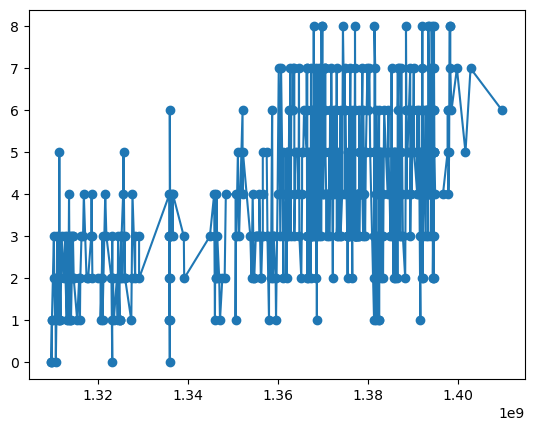

In [46]:

plt.plot(sorted_data['date'], sorted_data['technical'], marker='o')

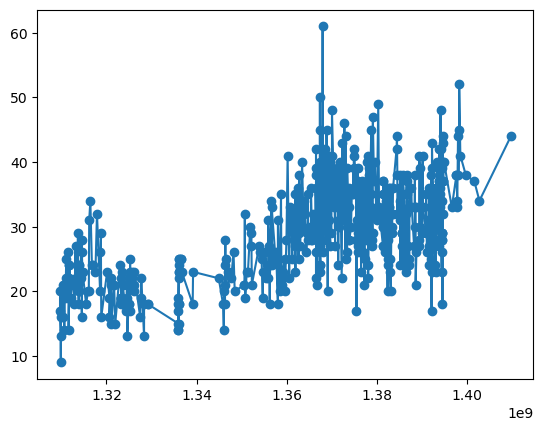

In [47]:
plt.plot(sorted_data['date'], sorted_data['expertness_score'], marker='o')

In [48]:
rev_of_exp = reviews_ba[(reviews_ba['review']==True ) & ( reviews_ba['user_id'] =='superspak.456300')]
rev_of_exp = score_df(rev_of_exp)
sorted_data = rev_of_exp.sort_values(by='date', ascending=True)
len(rev_of_exp)

5603

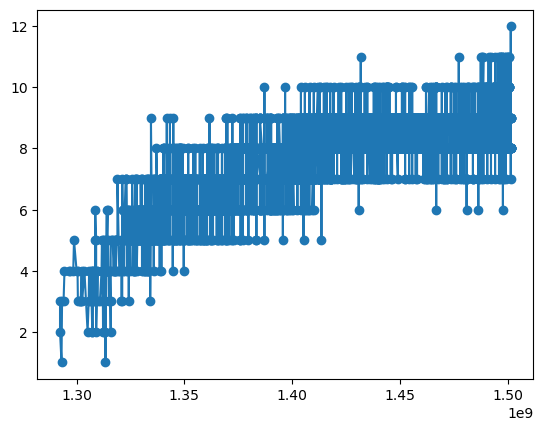

In [50]:

plt.plot(sorted_data['date'], sorted_data['technical'], marker='o')

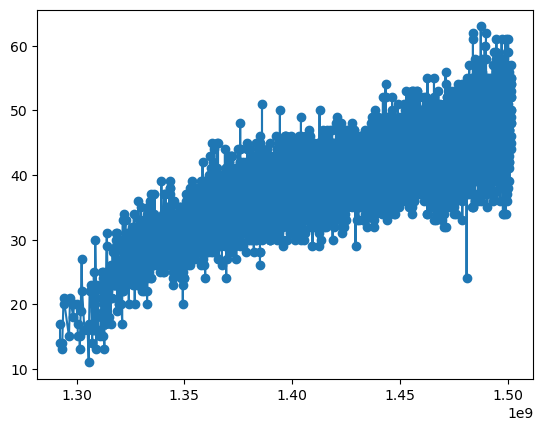

In [51]:

plt.plot(sorted_data['date'], sorted_data['expertness_score'], marker='o')

<Axes: ylabel='Frequency'>

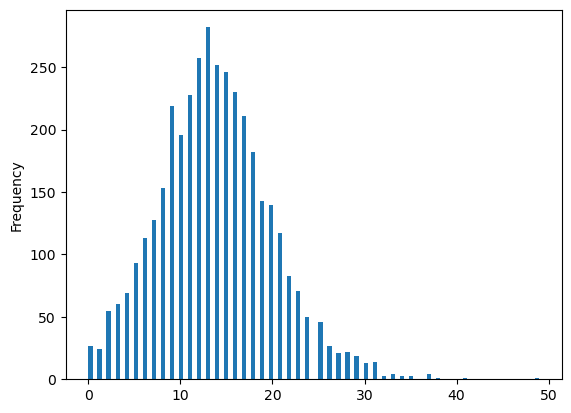

In [52]:
text_rev_stout['expertness_score'].plot(kind='hist', bins = 100)

In [53]:
reviews_IPA = reviews_ba[reviews_ba['beer_id']==2093]
text_rev_IPA = reviews_IPA[reviews_IPA['review']==True]
text_rev_IPA = score_df(text_rev_IPA)

<Axes: ylabel='Frequency'>

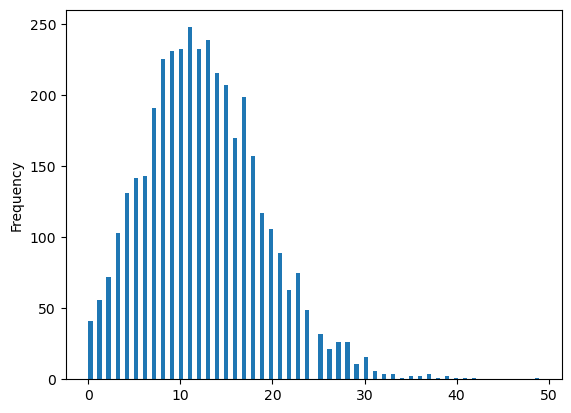

In [54]:
text_rev_IPA['expertness_score'].plot(kind='hist', bins = 100)

In [58]:
rev_true = reviews_ba[reviews_ba['review']==True][['user_id', 'beer_id', 'date', 'text']]
len(rev_true)

2589586

In [59]:
rev_true = rev_true.dropna()
len(rev_true)

2589584

In [100]:
start_time = time.time()

rev_true = score_df(rev_true)

print("--- %s seconds ---" % (time.time() - start_time))

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_16876\1486713882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['text_lower'] = x['text'].str.lower()


--- 1601.8126482963562 seconds ---


In [101]:
rev_true.to_csv(os.path.join(advocate_dir, 'reviews_with_exp_scores.csv'))